<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи.-Обучение-модели-без-учёта-дисбаланса" data-toc-modified-id="Исследование-задачи.-Обучение-модели-без-учёта-дисбаланса-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи. Обучение модели без учёта дисбаланса</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Изменение-порога-значений" data-toc-modified-id="Изменение-порога-значений-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога значений</a></span></li><li><span><a href="#Предварительные-выводы:" data-toc-modified-id="Предварительные-выводы:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Предварительные выводы:</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [1]:
import itertools
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
from random import randrange
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Признаки

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

Целевой признак

* Exited — факт ухода клиента

* Есть пропуски в 909 строках Tenure
* Geograpy, Gender - категориальные признаки (object)
* Эти столбцы можно удалить: RowNumber дублирует информацию индекса строки, а персональные данные клиента CustomerId и Surname не повлияют на обучение, а будут отъедать память и ресурсы 

In [4]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
#проверим на дубликаты
data.duplicated().sum()

0

Дубликатов нет

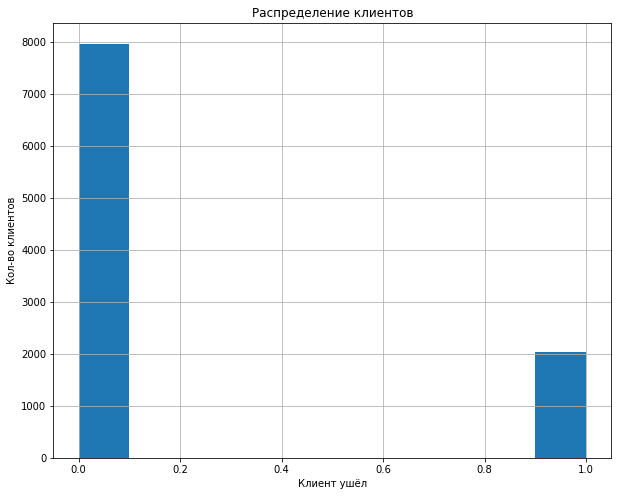

In [6]:
plt.figure()
data['Exited'].hist(figsize=(10,8))
plt.title('Распределение клиентов')
plt.xlabel('Клиент ушёл')
plt.ylabel('Кол-во клиентов')
plt.show()

Можно сделать вывод, что только ~20% клиентов уходит из банка. Данные несбалансированные.

In [7]:
data.Geography.value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

В датасете данные по клиентам трёх стран, распределение такое: Франция (50%), Германия (25%) и Испания (25%)

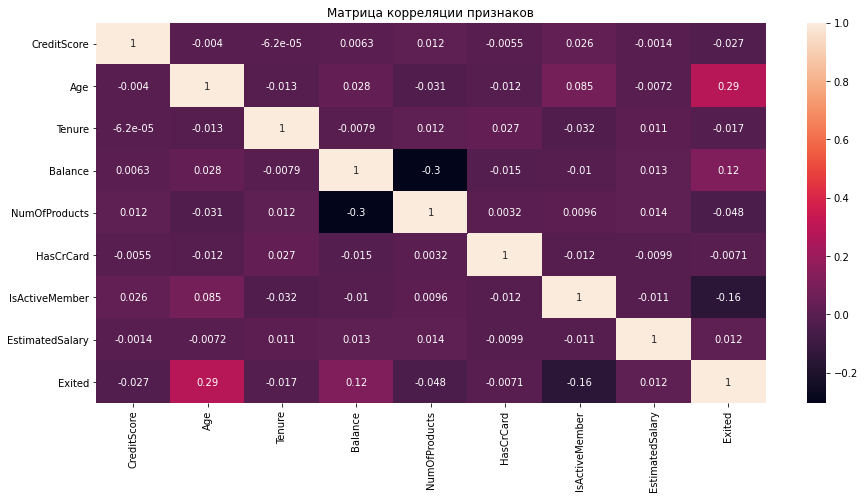

In [8]:
plt.figure(figsize=(15, 7))
plt.title('Матрица корреляции признаков')
sns.heatmap(data.corr(), annot = True)

plt.show()

Мы видим, что признаки практически не коррелируют между собой, но стоит отметить следующее:
* Самая большая корреляция у признаков Age и Exited – 0,29. Возраст — главный признак, который влияет на отток клиентов, ещё один занятный признак — баланс (0.12)
* Есть отрицательная корреляция между балансом и числом продуктов (-0.3) — чем больше у клиента продуктов банка, тем ниже его баланс. 
* Есть небольшая отрицательная корреляция между активностью клиента и его уходом: активные уходят реже.

Text(0, 0.5, 'Количество клиентов этой возрастной группы')

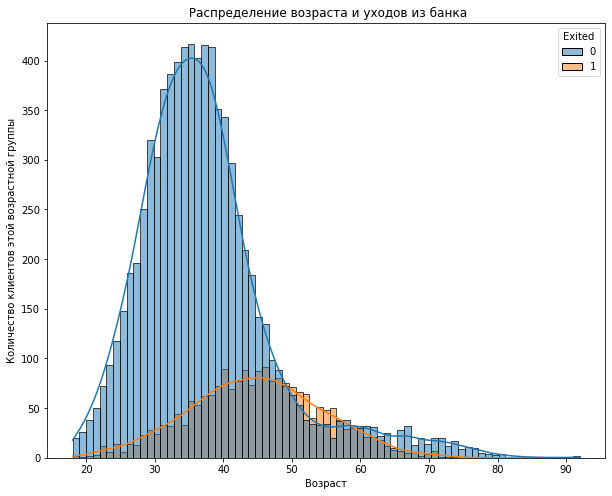

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(data=data, x='Age',hue='Exited', kde=True,bins=75, ax=ax)
plt.title(' Распределение возраста и уходов из банка')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов этой возрастной группы')

Можно чётко выделить, что чаще уходят люди от 40 до 55 лет. Тоже важный признак, удалять нельзя.
Проверим что там за корреляция с количеством банковских продуктов

In [10]:
a = data.groupby(['NumOfProducts', 'Exited'])['CreditScore'].count().rename("Доля оставшихся")
b = a /  a.groupby(level=0).sum()
pd.DataFrame(data=b).style.bar() 

Самые надёжные - люди с двумя кредитными продуктами, они практически не уходят из банка. Возможно это совпадение или особенность банка, но признак важный

In [11]:
a = data.groupby(['Geography', 'Exited'])['CreditScore'].count().rename("Доля оставшихся")
b = a /  a.groupby(level=0).sum()
pd.DataFrame(data=b).style.bar() 

Клиенты из Франции и Испании уходят примерно одинаково, а вот немецкие клиенты уходят в 2 раза чаще. Получается, страна — важный признак. И это категориальный признак — его нужно будет конвертировать в числовой.

Также посчитаем распределение ушедших из банка по половому признаку

In [12]:
a = data.groupby(['Gender', 'Exited'])['CreditScore'].count().rename("Доля оставшихся")
b = a /  a.groupby(level=0).sum()
pd.DataFrame(data=b).style.bar() 

Женщины уходят чаще мужчин. Тоже интересный показатель

Нужно что-то сделать с признаком Tenure - у него множество пропусков в данных. Этот признак слабо коррелирует с другими, поэтому можно попробовать заполнить пропуски медианным значением и перепроверить корреляцию.

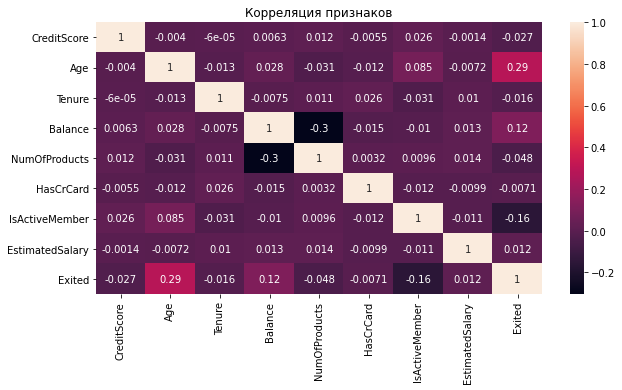

In [13]:
data['Tenure']=data['Tenure'].fillna(data['Tenure'].median())

plt.figure(figsize=(10, 5))
plt.title('Корреляция признаков')

sns.heatmap(data.corr(), annot = True)

plt.show()

Серьёзных изменений значений коэффициента не произошло, можем оставить заполнение таким и считать его корректным.

Следующий шаг — преобразование признаков. Воспользуемся техникой One-Hot Encoding, OHE

In [14]:
data = pd.get_dummies(data, drop_first=True)
data.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44,8.0,113755.78,2,1,0,149756.71,1,0,1,1
6,822,50,7.0,0.00,2,1,1,10062.80,0,0,0,1
7,376,29,4.0,115046.74,4,1,0,119346.88,1,1,0,0
8,501,44,4.0,142051.07,2,0,1,74940.50,0,0,0,1
9,684,27,2.0,134603.88,1,1,1,71725.73,0,0,0,1


Ещё одна задача - стандартизировать данные, так как у наших признаков разный масштаб и алгоритм автоматически может решить, что, скажем, EstimatedSalary важнее Age. А это не так: все признаки значимы (а Age и некоторые другие уж точно, как мы выше выяснили).

Воспользуемся StandardScaler, создадим объект этой структуры и настроим его на обучающих данных, а затем преобразуем.

Так как у нас нет тестовой выборки, делим данные на три части: обучающую, валидационную и тестовую в соотношении 3:1:1.

In [15]:
features = data.drop(['Exited'], axis=1)
target = data['Exited']

features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.2, 
                                                                            random_state=12345)


features_train, features_valid, target_train, target_valid = train_test_split(features_train,
                                                                target_train,
                                                                test_size=0.25,
                                                                random_state=12345)

print('Размер обучающей выборки:',features_train.shape[0])
print('Размер валидационной выборки:',features_valid.shape[0])
print('Размер тестовой выборки:',features_test.shape[0])
print('Общий размер исходного датасета: {} (сумма выборок: {})'.format(data.shape[0], features_train.shape[0]+features_valid.shape[0]+features_test.shape[0]))

Размер обучающей выборки: 6000
Размер валидационной выборки: 2000
Размер тестовой выборки: 2000
Общий размер исходного датасета: 10000 (сумма выборок: 10000)


In [16]:
#Стандартизируем параметры

numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# обучаем стандартизацию
pd.options.mode.chained_assignment = None
scaler = StandardScaler()
scaler.fit(features_train[numeric]) 
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

## Исследование задачи. Обучение модели без учёта дисбаланса

Мы будем использовать три модели машинного обучения: дерево решений, случайный лес и линейную регрессию

In [17]:
#напишем функцию для вывода графика ROC и нужных параметров для решения задачи
def auc_roc(model, features_valid=features_valid, target_valid=target_valid):
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid) 
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()
    
    print('Расчёт площади кривой ROC: {:.4f}'.format(roc_auc_score(target_valid, probabilities_one_valid)))

In [18]:
#подбор параметров для несбалансированной выборки дерево решений
best_depth_tree = 0 
f1_best_tree = 0

for depth in range(1, 31):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    if f1 > f1_best_tree:
        best_depth_tree = depth
        f1_best_tree = f1

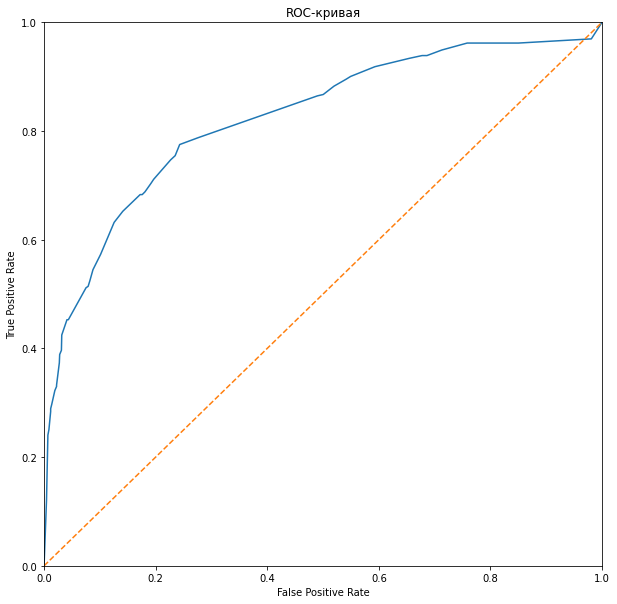

Расчёт площади кривой ROC: 0.8231
Расчёт F1: 0.5583596214511041


In [19]:
#Проверяем дерево решений
model = DecisionTreeClassifier(random_state=12345,
                               max_depth=best_depth_tree)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

auc_roc(model)

print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Задача — построить модель с предельно большим значением F1-меры. Нужно довести метрику F1 до 0.59, сейчас 0.55. Смотрим другие модели.

In [20]:
#подбираем параметры для модели случайного леса
best_depth_forest = 0
best_est_forest = 0 
f1_best_forest = 0

for est in range(10, 61, 10):
    for depth in range (1, 25):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > f1_best_forest:
            best_depth_forest = depth
            best_est_forest = est
            f1_best_forest = f1
# сохраняем параметры
forest_best = {'depth':best_depth_forest, 'n_estimators':best_est_forest}

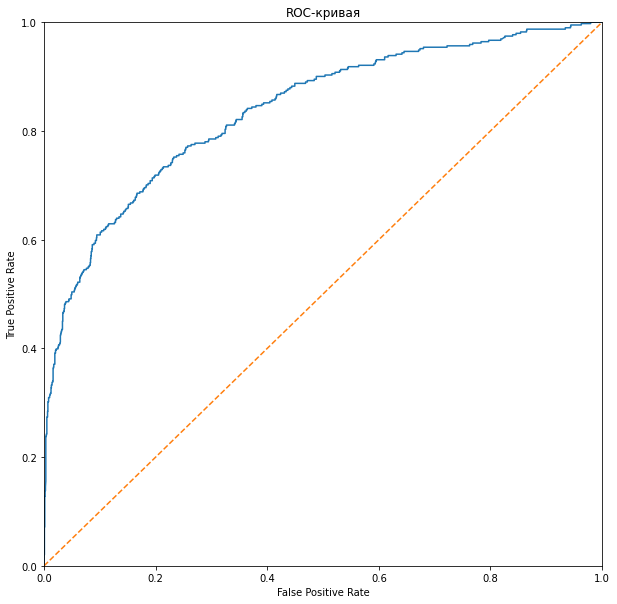

Расчёт площади кривой ROC: 0.8379
Расчёт F1: 0.5805422647527911


In [21]:
model = RandomForestClassifier(random_state=12345,
                               n_estimators=best_est_forest,
                               max_depth=best_depth_forest)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc(model)

print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Площадь кривой больше, значение F1 недотягивает до 59. Идём дальше.

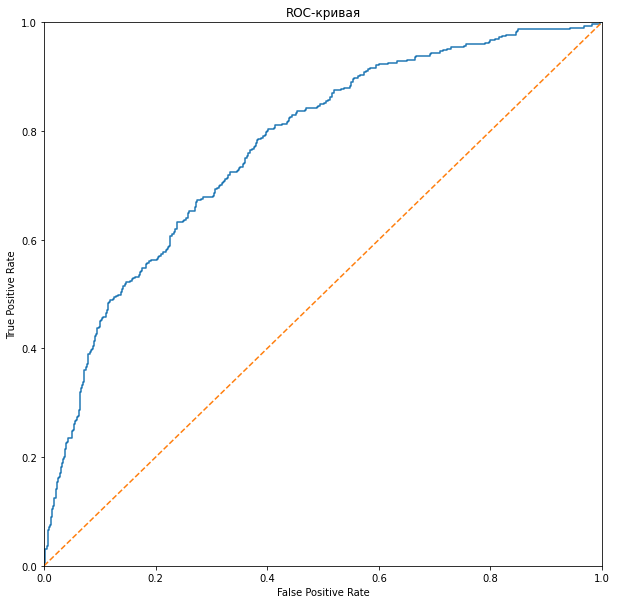

Расчёт площади кривой ROC: 0.7703
Расчёт F1: 0.30131826741996237


In [22]:
#Третья модель — логическая регрессия
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Метрики логической регрессии оказались хуже модели деревьев и случайного леса.

В целом пока метрики не удовлетворяют нужным нам требованиям — нам нужно решать проблему с дисбалансом классов, ведь как мы подсчитали выше, лишь 20% клиентов уходят из банка и данные неслабансированные.

## Борьба с дисбалансом

Есть несколько способов избавиться от дисбаланса:
* Взвешивание классов
* Увеличение выборки
* Уменьшение выборки
* Изменение порога классификации

### Взвешивание классов

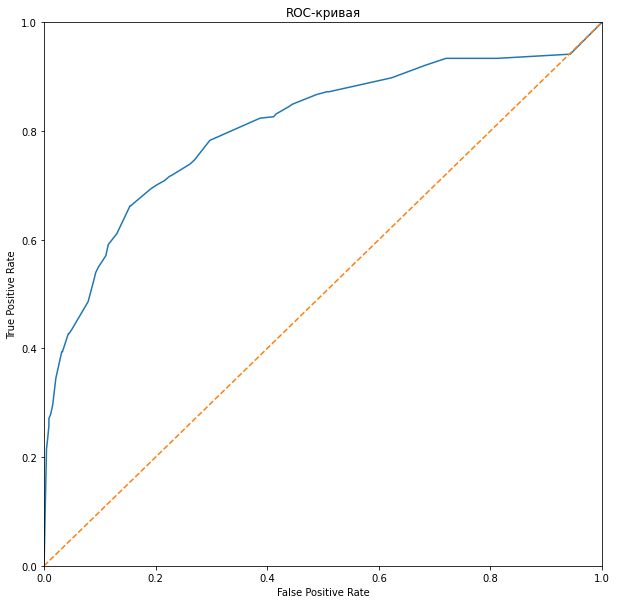

Расчёт площади кривой ROC: 0.8059
Расчёт F1: 0.5535353535353534


In [23]:
#дерево решений
model = DecisionTreeClassifier(random_state=12345,
                               max_depth=best_depth_tree,
                               class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)


auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Метрики остались хуже необходимого

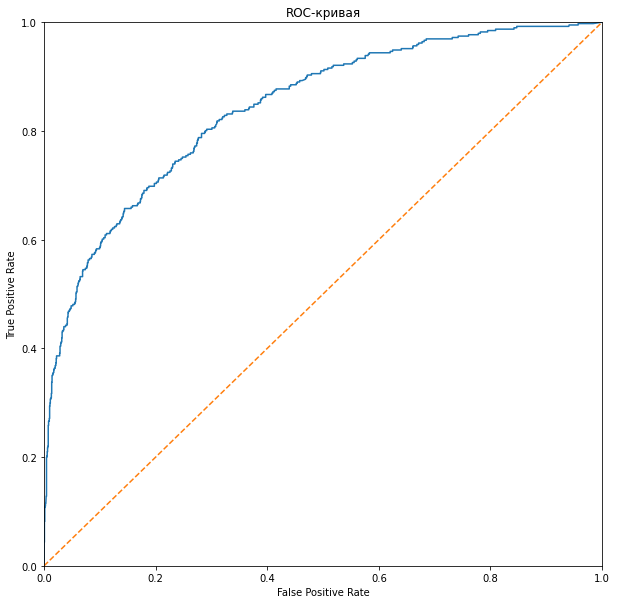

Расчёт площади кривой ROC: 0.8422
Расчёт F1: 0.5637181409295353


In [24]:
#взвешивание классов
#случайный лес

model = RandomForestClassifier(random_state=12345,
                               n_estimators=best_est_forest,
                               max_depth=best_depth_forest,
                              class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Метрики качества не соответствуют необходимым

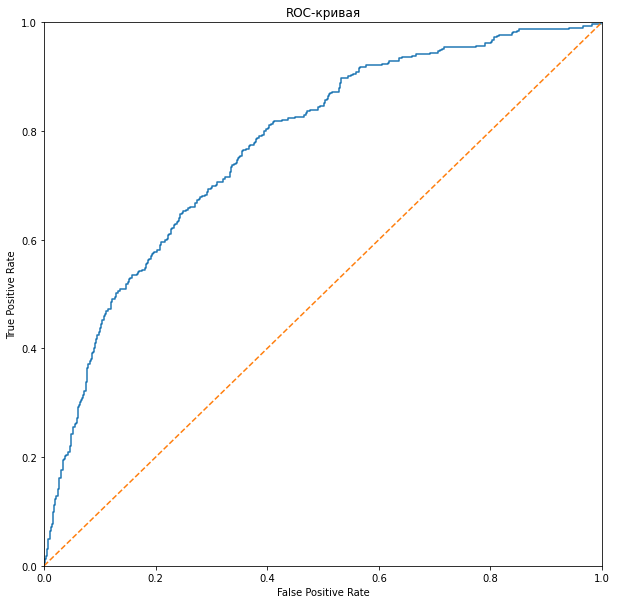

Расчёт площади кривой ROC: 0.7726
Расчёт F1: 0.4741532976827095


In [25]:
#взвешивание классов
#логическая регрессия

model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)

auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Метрики качества не соответствуют необходимым

### Увеличение выборки

In [26]:
# Создаём функцию для увеличения и перемешивания выборки

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

Нам нужно увеличить выборку в 4 раза, так как количество ушедших клиентов в 4 раза меньше (20% против 80%)

In [27]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [28]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(9657, 11)
(9657,)


Проверка успешна, выборка увеличена

In [29]:
#подбор параметров для сбалансированной выборки дерева решений
best_depth_tree = 0 
f1_best_tree = 0

for depth in range(1, 31):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    if f1 > f1_best_tree:
        best_depth_tree = depth
        f1_best_tree = f1

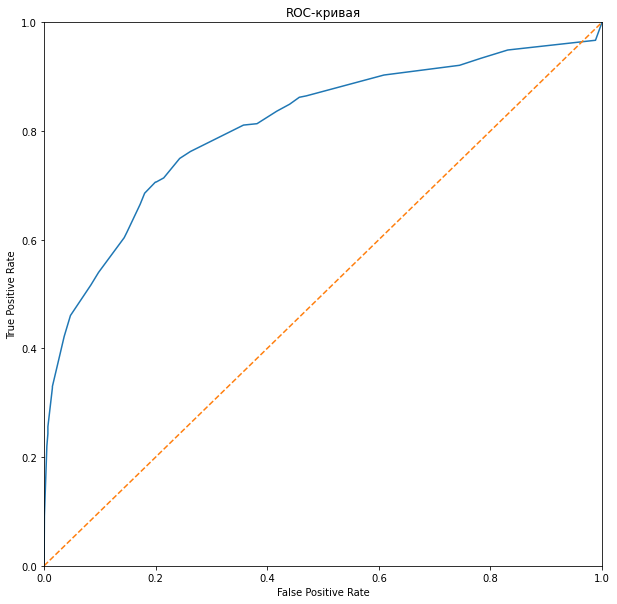

Расчёт площади кривой ROC: 0.8091
Расчёт F1: 0.5587044534412956


In [30]:
model = DecisionTreeClassifier(random_state=12345,
                               max_depth=best_depth_tree)
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)

auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

F1 выросла незначительно и всё ещё меньше таргета в 0.59

In [31]:
#подбираем параметры для модели случайного леса
best_depth_forest = 0
best_est_forest = 0 
f1_best_forest = 0

for est in range(10, 61, 10):
    for depth in range (1, 25):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > f1_best_forest:
            best_depth_forest = depth
            best_est_forest = est
            f1_best_forest = f1

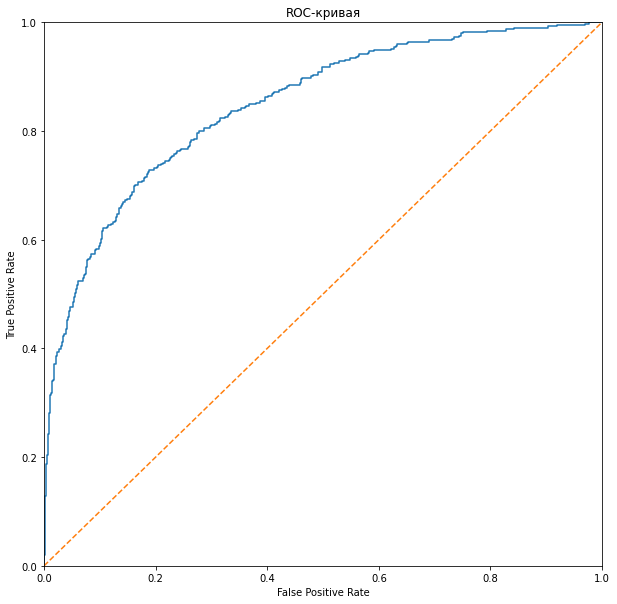

Расчёт площади кривой ROC: 0.8469
Расчёт F1: 0.6022584692597239


In [32]:
model = RandomForestClassifier(random_state=12345,
                               n_estimators=best_est_forest,
                               max_depth=best_depth_forest)
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)


auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Значение F1 превышает 0.60 и удовлетворяет нашей задаче (>0.59)!

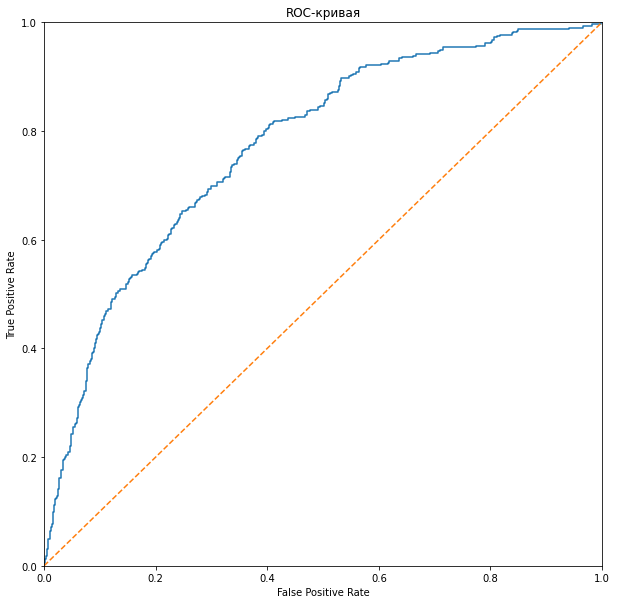

Расчёт площади кривой ROC: 0.7726
Расчёт F1: 0.4771126760563381


In [33]:
#проверка увеличенной выборки на линейной регрессии

model = LogisticRegression(random_state=12345)
model.fit(features_upsampled, target_upsampled)
predictions_valid = model.predict(features_valid)

auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Метрики ниже необходимых

### Уменьшение выборки

Следующий способ борьбы с дисбалансом — уменьшение выборки (в нашем случае – в 4 раза)

In [34]:
#функция уменьшения выборки
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [35]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [36]:
print(features_downsampled.shape)
print(target_downsampled.shape)

(2414, 11)
(2414,)


Выборка уменьшена в 4 раза. Можно тестировать

In [37]:
#подбор параметров для сбалансированной выборки дерево решений
best_depth_tree = 0 
f1_best_tree = 0

for depth in range(1, 31):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_downsampled, target_downsampled)
    predictions_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    if f1 > f1_best_tree:
        best_depth_tree = depth
        f1_best_tree = f1

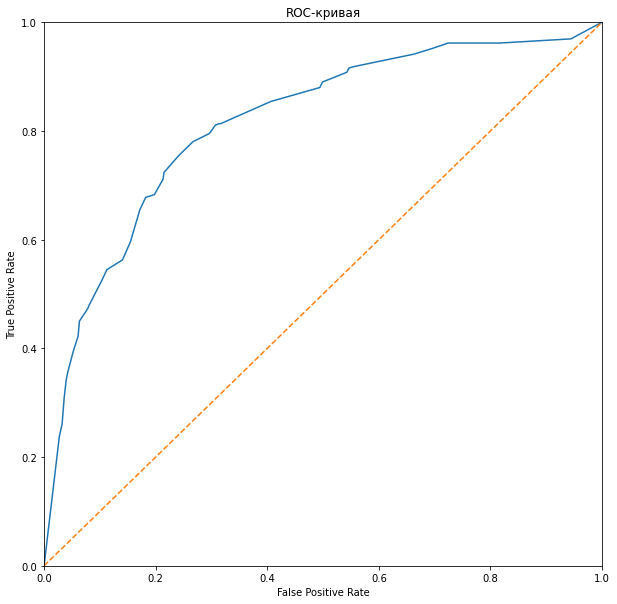

Расчёт площади кривой ROC: 0.8144
Расчёт F1: 0.5493482309124766


In [38]:
model = DecisionTreeClassifier(random_state=12345,
                               max_depth=best_depth_tree)
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)

auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Метрики меньше необходимого

In [39]:
#подбираем параметры для модели случайного леса
best_depth_forest = 0
best_est_forest = 0 
f1_best_forest = 0

for est in range(10, 61, 10):
    for depth in range (1, 25):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_downsampled, target_downsampled)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > f1_best_forest:
            best_depth_forest = depth
            best_est_forest = est
            f1_best_forest = f1

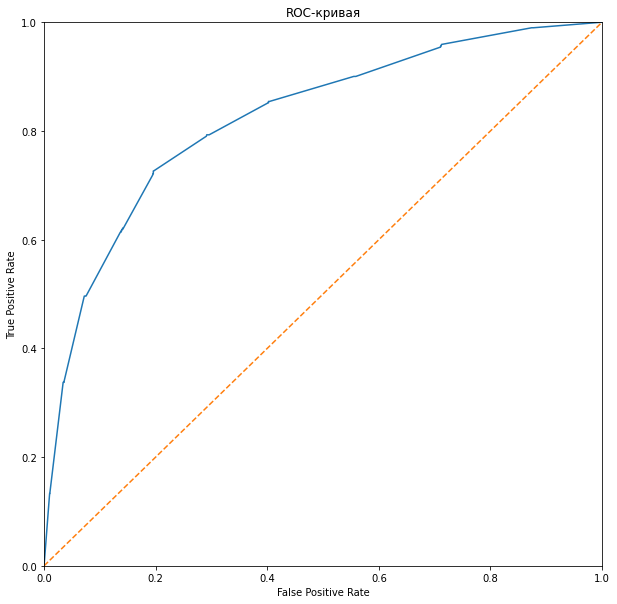

Расчёт площади кривой ROC: 0.8233
Расчёт F1: 0.5731584258324924


In [40]:
model = RandomForestClassifier(random_state=12345,
                               n_estimators=best_est_forest,
                               max_depth=best_depth_forest)
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)

auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Метрики ниже необходимых в 0.59 и хуже, чем при увеличении выборки

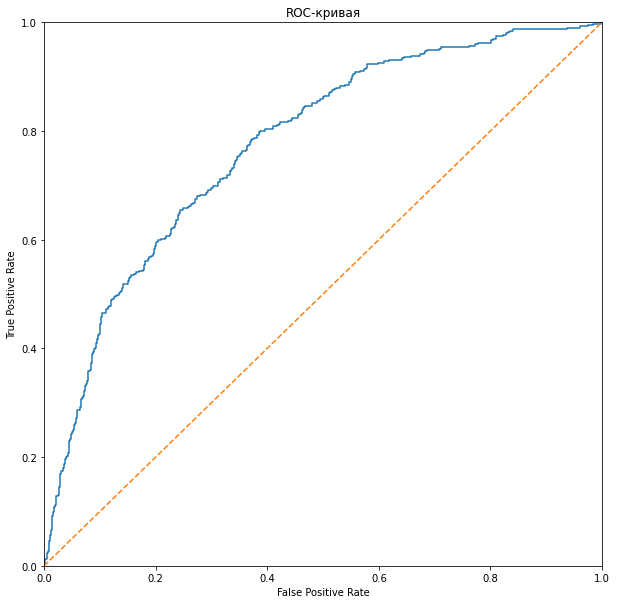

Расчёт площади кривой ROC: 0.7738
Расчёт F1: 0.4741000877963125


In [41]:
#проверка уменьшенной выборки на линейной регрессии

model = LogisticRegression(random_state=12345)
model.fit(features_downsampled, target_downsampled)
predictions_valid = model.predict(features_valid)

auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predictions_valid)))

Результаты ниже необходимого

### Изменение порога значений

Порог = 0.00 | F1 = 0.323
Порог = 0.02 | F1 = 0.352
Порог = 0.04 | F1 = 0.389
Порог = 0.06 | F1 = 0.404
Порог = 0.08 | F1 = 0.442
Порог = 0.10 | F1 = 0.538
Порог = 0.14 | F1 = 0.559
Порог = 0.16 | F1 = 0.564
Порог = 0.20 | F1 = 0.565
Порог = 0.24 | F1 = 0.567
Порог = 0.26 | F1 = 0.571
Порог = 0.28 | F1 = 0.584


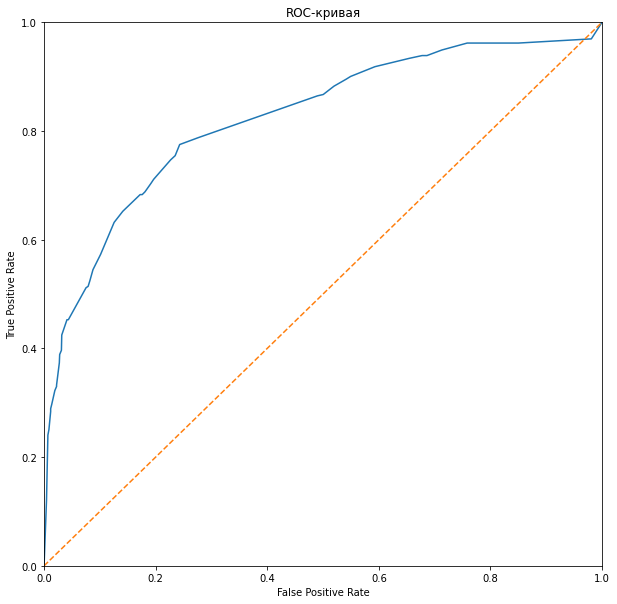

Расчёт площади кривой ROC: 0.8231
Расчёт F1: 0.5841924398625429


In [42]:
#Четвёртый способ — изменение порога значений, переберём их для каждой модели.
#Дерево решений

model = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_tree)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f1_best_tree = 0
predicted_best = []
for threshold in np.arange(0, 0.5, 0.02):
    predictions_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predictions_valid)
    if f1 > f1_best_tree:
        f1_best_tree= f1
        predicted_best = predictions_valid
        print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))

auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predicted_best)))

Метрики чуть хуже необходимого

Порог = 0.00 | F1 = 0.328
Порог = 0.02 | F1 = 0.359
Порог = 0.04 | F1 = 0.391
Порог = 0.06 | F1 = 0.420
Порог = 0.08 | F1 = 0.444
Порог = 0.10 | F1 = 0.468
Порог = 0.12 | F1 = 0.483
Порог = 0.14 | F1 = 0.503
Порог = 0.16 | F1 = 0.513
Порог = 0.18 | F1 = 0.537
Порог = 0.20 | F1 = 0.552
Порог = 0.22 | F1 = 0.562
Порог = 0.24 | F1 = 0.567
Порог = 0.26 | F1 = 0.575
Порог = 0.28 | F1 = 0.581
Порог = 0.30 | F1 = 0.589
Порог = 0.32 | F1 = 0.599
Порог = 0.34 | F1 = 0.609


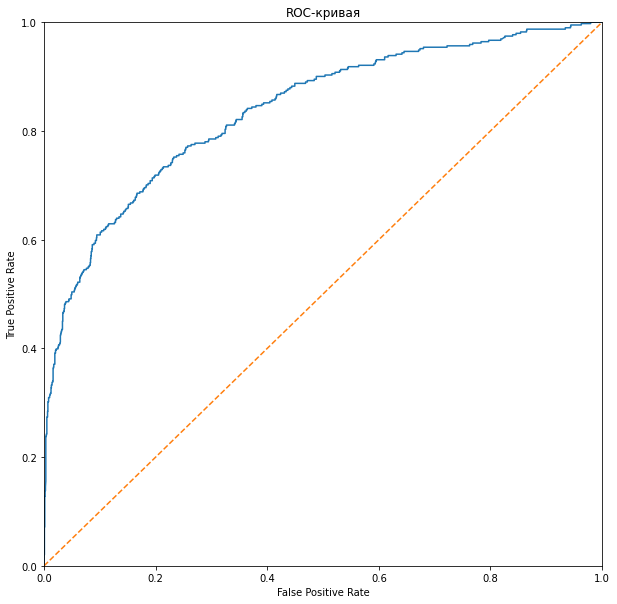

Расчёт площади кривой ROC: 0.8379
Расчёт F1: 0.6086956521739131


In [43]:
#случайный лес
model = RandomForestClassifier(random_state=12345,
                               max_depth=forest_best['depth'], 
                               n_estimators=forest_best['n_estimators'])
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f1_best = 0
for threshold in np.arange(0, 0.5, 0.02):
    predictions_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predictions_valid)
    if f1 > f1_best:
        f1_best = f1
        print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))
        predicted_best = predictions_valid
        
auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predicted_best)))

F1 выше необходимого и превышает тот, что был при увеличении выборки!

Порог = 0.00 | F1 = 0.327
Порог = 0.02 | F1 = 0.327
Порог = 0.04 | F1 = 0.344
Порог = 0.06 | F1 = 0.367
Порог = 0.08 | F1 = 0.389
Порог = 0.10 | F1 = 0.412
Порог = 0.12 | F1 = 0.429
Порог = 0.14 | F1 = 0.446
Порог = 0.16 | F1 = 0.463
Порог = 0.20 | F1 = 0.467
Порог = 0.22 | F1 = 0.475
Порог = 0.24 | F1 = 0.477
Порог = 0.28 | F1 = 0.479
Порог = 0.30 | F1 = 0.486
Порог = 0.32 | F1 = 0.494


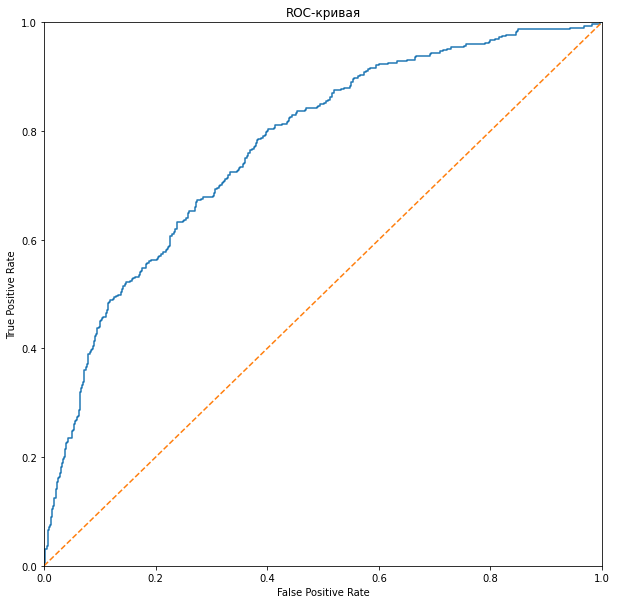

Расчёт площади кривой ROC: 0.7703
Расчёт F1: 0.49417852522639066


In [44]:
#логическая регрессия
model = LogisticRegression(random_state=12345)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f1_best = 0
for threshold in np.arange(0, 1.1, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predicted_valid)
    if f1 > f1_best:
        f1_best = f1
        print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))
        predicted_best = predicted_valid


auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predicted_best)))

Метрика F1 меньше требуемой

### Предварительные выводы:

Лучший результат, который нас устраивает, показал случайный лес при изменении порогового значения. Результаты:
* Расчёт площади кривой ROC: 0.8379
* Расчёт F1: 0.6086956521739131

Но можно обратить внимание, что изменение порога значений тоже давало улучшенный результат по случайному лесу - мы можем попробовать объединить два способа и обучить модель с изменённым порогом значений по увеличенной выборке и посмотреть, улучшится ли F1

In [45]:
best_depth_forest = 0
best_est_forest = 0 
f1_best_forest = 0

for est in range(10, 61, 10):
    for depth in range (1, 25):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > f1_best_forest:
            best_depth_forest = depth
            best_est_forest = est
            f1_best_forest = f1

Порог = 0.00 | F1 = 0.327
Порог = 0.02 | F1 = 0.337
Порог = 0.04 | F1 = 0.351
Порог = 0.06 | F1 = 0.366
Порог = 0.08 | F1 = 0.385
Порог = 0.10 | F1 = 0.403
Порог = 0.12 | F1 = 0.420
Порог = 0.14 | F1 = 0.439
Порог = 0.16 | F1 = 0.455
Порог = 0.18 | F1 = 0.468
Порог = 0.20 | F1 = 0.479
Порог = 0.22 | F1 = 0.491
Порог = 0.24 | F1 = 0.508
Порог = 0.26 | F1 = 0.519
Порог = 0.28 | F1 = 0.532
Порог = 0.30 | F1 = 0.541
Порог = 0.32 | F1 = 0.550
Порог = 0.34 | F1 = 0.559
Порог = 0.36 | F1 = 0.570
Порог = 0.38 | F1 = 0.581
Порог = 0.40 | F1 = 0.589
Порог = 0.44 | F1 = 0.593
Порог = 0.50 | F1 = 0.602


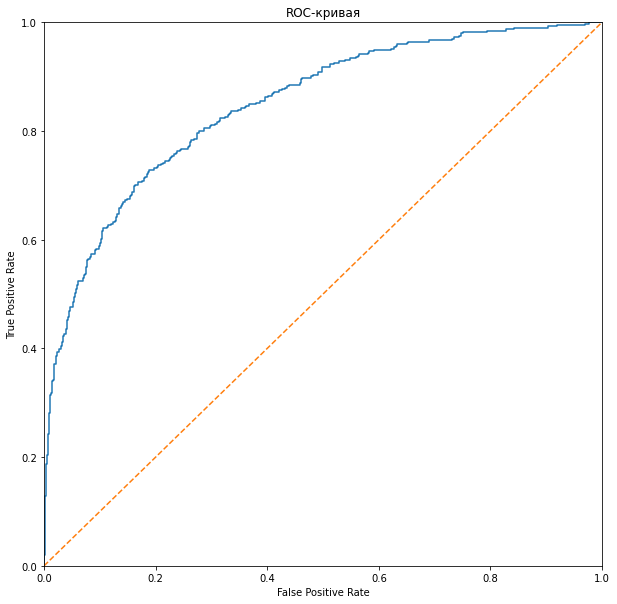

Расчёт площади кривой ROC: 0.8469
Расчёт F1: 0.6022584692597239


In [46]:
model = RandomForestClassifier(random_state=12345,
                               max_depth=best_depth_forest, 
                               n_estimators=best_est_forest)
model.fit(features_upsampled, target_upsampled)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

f1_best = 0
for threshold in np.arange(0, 1, 0.02):
    predictions_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_valid, predictions_valid)
    if f1 > f1_best:
        f1_best = f1
        print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))
        predicted_best = predictions_valid
        
auc_roc(model)
print('Расчёт F1:' ,(f1_score(target_valid, predicted_best)))

Показатель F1 оказался ниже, чем у увеличенной выборки без изменения пороговых значений. Значит будем тестировать модель на модели с изменением пороговых значений.

## Тестирование модели

Сначала нам нужно стандартизировать данные в тестовой выборке и объединить обучающую и валидационную выборки

In [47]:
#объединяем
final_features = pd.concat([features_train, features_valid])
final_target = pd.concat([target_train, target_valid])

#проверим дисбаланс классов
display(final_target.sum(), final_target.count())

1610

8000

Нужно увеличить выборку примерно в 4 раза

In [48]:
final_features, final_target = upsample(final_features, final_target, 4)

Порог = 0.00 | F1 = 0.352
Порог = 0.02 | F1 = 0.366
Порог = 0.04 | F1 = 0.383
Порог = 0.06 | F1 = 0.407
Порог = 0.08 | F1 = 0.425
Порог = 0.10 | F1 = 0.440
Порог = 0.12 | F1 = 0.456
Порог = 0.14 | F1 = 0.475
Порог = 0.16 | F1 = 0.489
Порог = 0.18 | F1 = 0.504
Порог = 0.20 | F1 = 0.519
Порог = 0.22 | F1 = 0.535
Порог = 0.24 | F1 = 0.555
Порог = 0.26 | F1 = 0.560
Порог = 0.28 | F1 = 0.573
Порог = 0.30 | F1 = 0.585
Порог = 0.32 | F1 = 0.593
Порог = 0.34 | F1 = 0.599
Порог = 0.36 | F1 = 0.609
Порог = 0.42 | F1 = 0.610
Порог = 0.44 | F1 = 0.615
Порог = 0.46 | F1 = 0.621

Расчёт площади кривой ROC: 0.8521642292134096
Расчёт F1: 0.6213151927437642


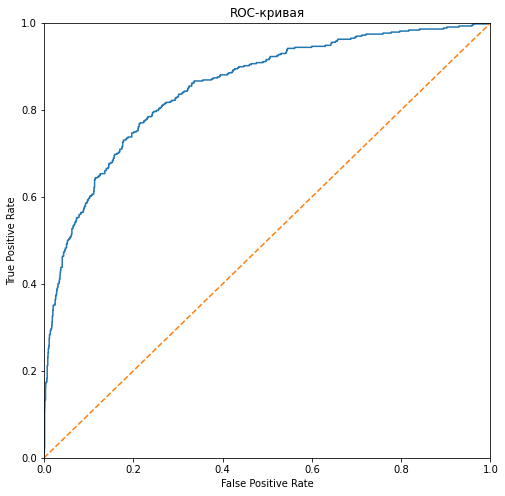

In [51]:
model = RandomForestClassifier(random_state=12345,
                               max_depth=forest_best['depth'], 
                               n_estimators=forest_best['n_estimators'])
model.fit(final_features, final_target)
probabilities_valid = model.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]

f1_best = 0
for threshold in np.arange(0, 0.8, 0.02):
    predictions_valid = probabilities_one_valid > threshold
    f1 = f1_score(target_test, predictions_valid)
    if f1 > f1_best:
        f1_best = f1
        print("Порог = {:.2f} | F1 = {:.3f}".format(
        threshold, f1))
        predicted_best = predictions_valid
        
#результаты с графиком выделил отдельно, так как структура кода чуть иная и так надёжнее 
print ('')
print ('Расчёт площади кривой ROC:', roc_auc_score(target_test, probabilities_one_valid))
print ('Расчёт F1:' ,(f1_score(target_test, predicted_best)))

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid)

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

Мы получили на тестовой выборке итоговые результаты, удовлетворяющие условию (F1>5.9)
* Расчёт площади кривой ROC: 0.8521642292134096
* F1: 0.6213151927437642

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*